# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan dalam proyek ini adalah Diabetes Dataset, yaitu kumpulan data kesehatan yang digunakan untuk memprediksi apakah seorang pasien berisiko terkena diabetes berdasarkan beberapa parameter medis.
Memiliki jumlah data sebanyak 768 baris dengan jumlah fitur sebanyak 8 dan 1 label (outcome) yang memiliki tipe perdiksi Binarry Classification ( 0 : Pasien tidak berisiko diabeter dan 1 : pasien berisiko diabeter)
Fitur dalam dataset:
1. Pregnancies – Jumlah kehamilan
2. Glucose – Konsentrasi glukosa plasma
3. BloodPressure – Tekanan darah diastolik
4. SkinThickness – Ketebalan lipatan kulit
5. Insulin – Konsentrasi insulin 2 jam
6. BMI – Body Mass Index
7. DiabetesPedigreeFunction – Riwayat diabetes keluarga
8. Age – Usia pasien
9. Outcome – Label (0 = tidak diabetes, 1 = diabetes)

Sumber dataset:
Kaggle – Pima Indians Diabetes Database
https://www.kaggle.com/code/mragpavank/pima-indians-diabetes-database 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Ukuran dataset: (768, 9)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  

<Figure size 1200x1000 with 0 Axes>

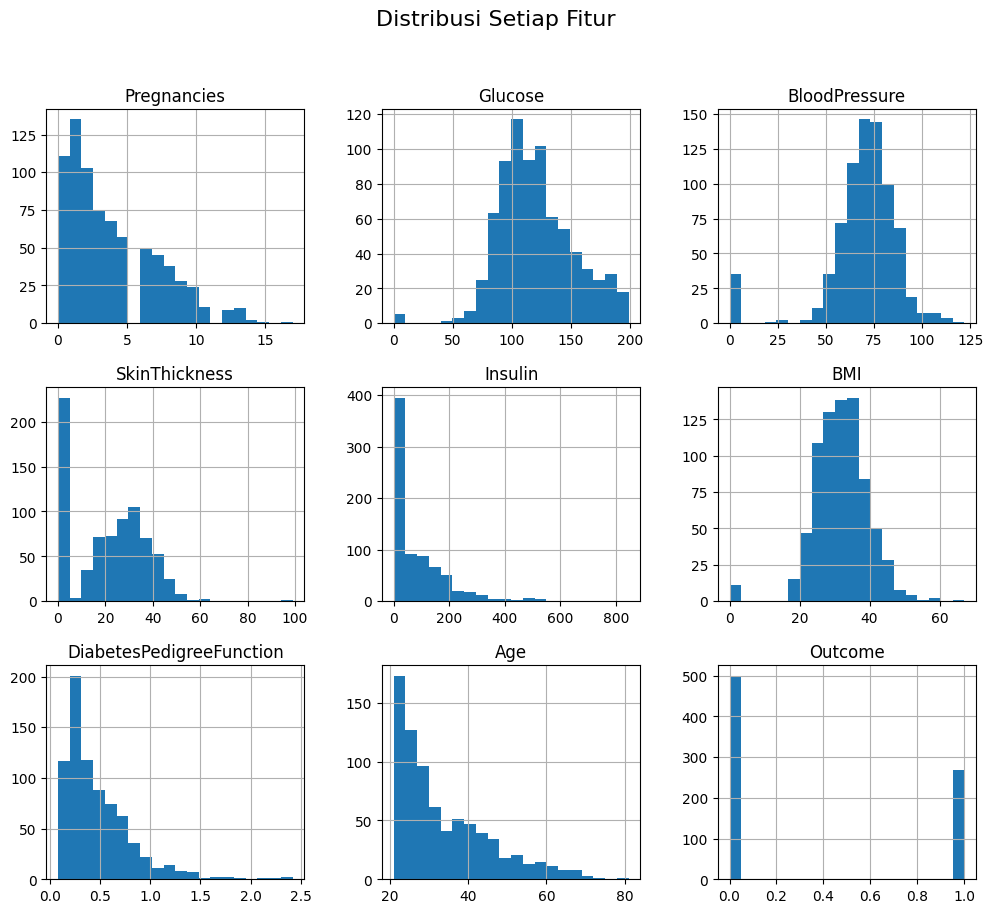

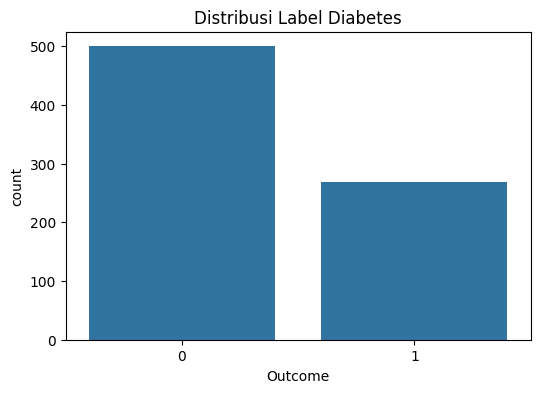

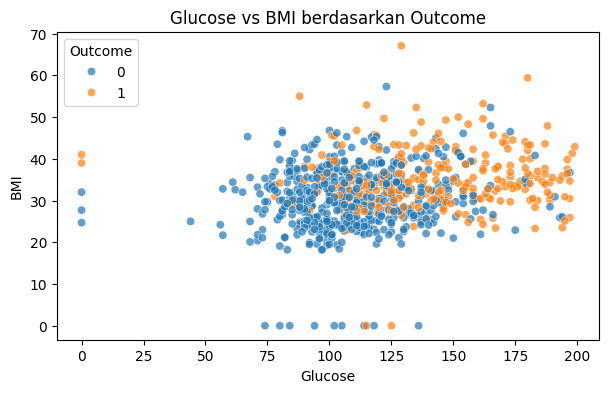

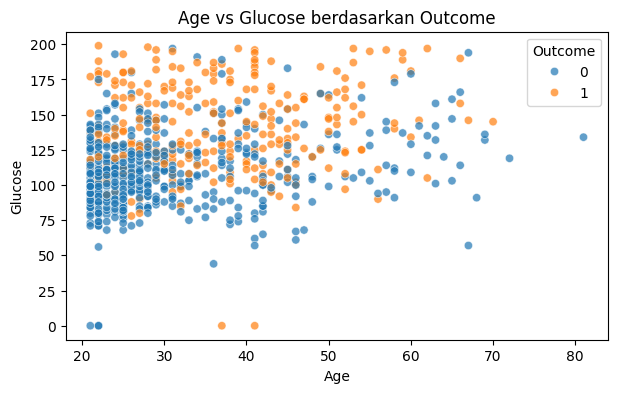

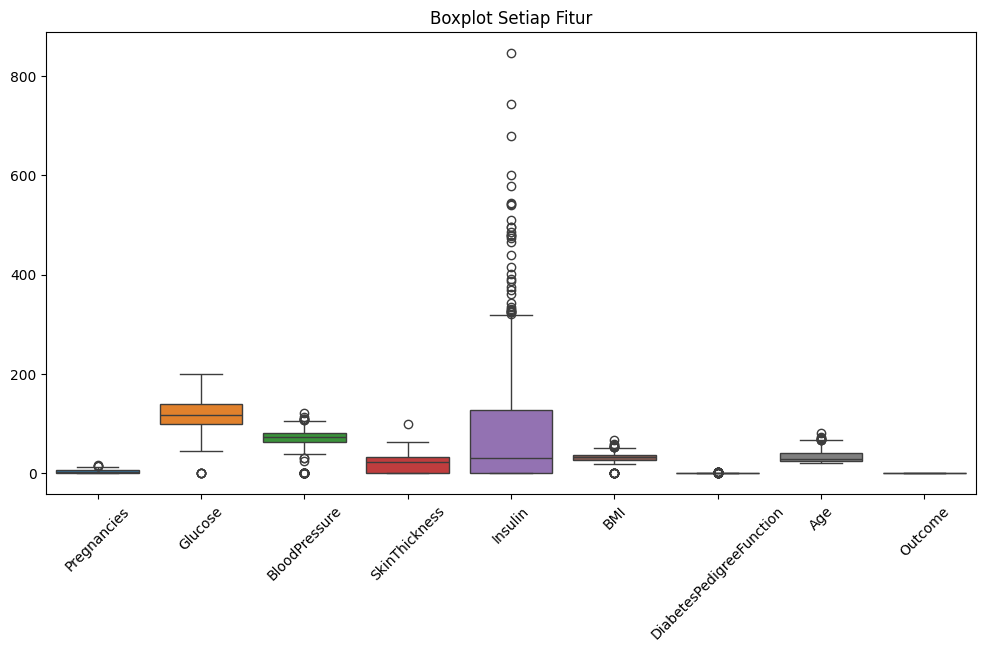

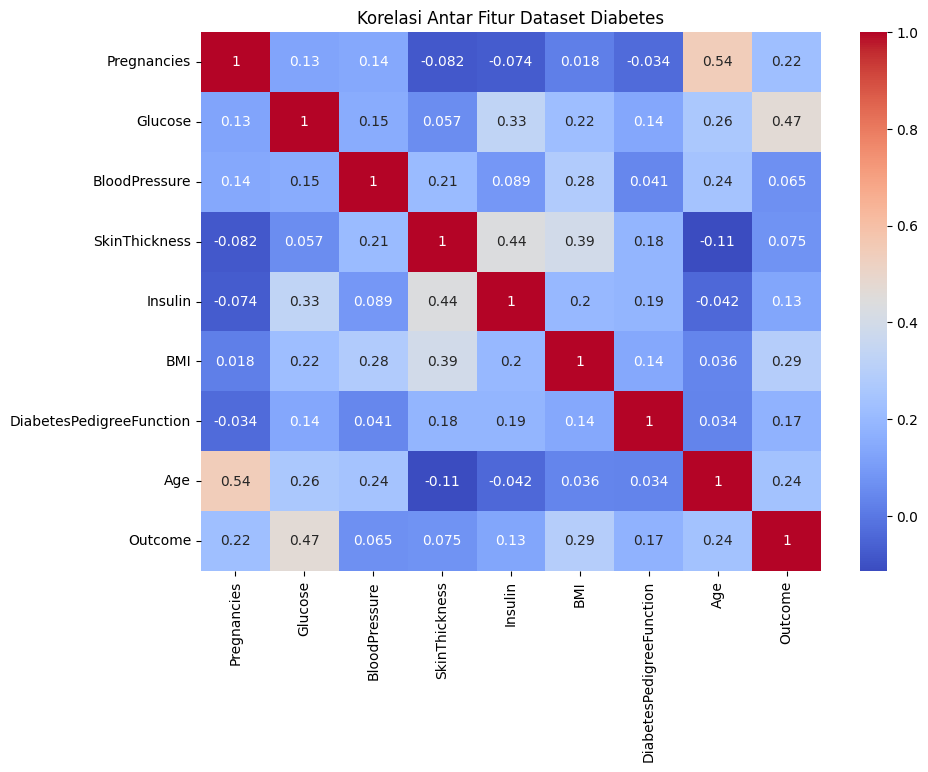

In [3]:
# 1. Ukuran dataset
print("Ukuran dataset:", df.shape)

# 2. Info dataset
print("\nInfo dataset:")
print(df.info())

# 3. Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

# 4. Cek missing value
print("\nJumlah missing values tiap kolom:")
print(df.isnull().sum())

plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribusi Setiap Fitur", fontsize=16)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Label Diabetes")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, alpha=0.7)
plt.title("Glucose vs BMI berdasarkan Outcome")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, alpha=0.7)
plt.title("Age vs Glucose berdasarkan Outcome")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot Setiap Fitur")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Korelasi Antar Fitur Dataset Diabetes")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
df_prep = df.copy()

cols_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_prep[cols_zero_invalid] = df_prep[cols_zero_invalid].replace(0, np.nan)

df_prep = df_prep.dropna()

df_prep = df_prep.drop_duplicates()

# Deteksi & hapus outlier menggunakan IQR (semua kolom kecuali Outcome)
for col in df_prep.columns:
    if col != 'Outcome':
        Q1 = df_prep[col].quantile(0.25)
        Q3 = df_prep[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_prep = df_prep[(df_prep[col] >= lower) & (df_prep[col] <= upper)]

# Scaling fitur numerik
scaler = StandardScaler()
numerical_cols = df_prep.drop(columns=['Outcome']).columns
df_prep[numerical_cols] = scaler.fit_transform(df_prep[numerical_cols])

# Simpan dataset hasil preprocessing
output_path = "diabetes_preprocessing.csv"
df_prep.to_csv(output_path, index=False)

print("Dataset preprocessing selesai disimpan di:", output_path)

Dataset preprocessing selesai disimpan di: diabetes_preprocessing.csv
